In [1]:
import sys
sys.path.append('../')
import os
import numpy as np
import json
import matplotlib.pyplot as plt
from scipy.signal import find_peaks, peak_prominences
import Utils.graphing_helpers
import read_data as rd
import importlib
importlib.reload(Utils.graphing_helpers)
from Utils.graphing_helpers import (plot_vicsek_phase_diagram, plot_dir_cross_vel_phase_diagram,  plot_dir_cross_vel_norm_phase_diagram, 
                                    save_fig_pdf, edges_from_centers_log, edges_from_centers_linear)
from Analysis_Calculations.local_packing_fraction import get_local_packing_fraction, get_peaks_info

In [12]:
def load_statistic_data(value_key, Dr_vals, J_vals, exp_dir):
    statistic_values = []
    for D_r in Dr_vals:
        row_of_values = []
        for J in J_vals:
            single_simulation_stats_filename = os.path.join(exp_dir, "J=%.4f_and_Dr=%.4f"%(J, D_r), 'single_stats.json')
            if os.path.isfile(single_simulation_stats_filename):
                with open(single_simulation_stats_filename) as stats_file:
                    stats = json.loads(stats_file.read())
                row_of_values.append(stats[value_key])
            else:
                row_of_values.append(np.nan)
        statistic_values.append(row_of_values)
    statistic_values = np.array(statistic_values)
    return statistic_values

In [19]:
def load_statistic_data_2(value_key, Dr_vals, J_vals, exp_dir):
    return_grid_shape = (len(Dr_vals), len(J_vals))
    statistic_values = np.zeros(return_grid_shape)

    for Dr_index, Dr in enumerate(Dr_vals):
        for J_index, J in enumerate(J_vals):
            single_simulation_stats_filename = os.path.join(exp_dir, "J=%.4f_and_Dr=%.4f"%(J, Dr), 'single_stats.json')
            if os.path.isfile(single_simulation_stats_filename):
                with open(single_simulation_stats_filename) as stats_file:
                    stats = json.loads(stats_file.read())[value_key]
            else:
                stats = np.nan
            
            statistic_values[Dr_index, J_index] = stats
    return statistic_values

In [20]:
vicsek_vals_2 = load_statistic_data_2('packing_std_dev', Dr_vals, J_vals, exp_dir)
vicsek_vals_2

array([[0.33031579, 0.34883216, 0.39168608, 0.40436666, 0.41372984,
        0.44237894, 0.42563067, 0.41200203, 0.35486679, 0.34976384,
        0.26036381, 0.07779504, 0.06348956],
       [0.25860903, 0.31383426, 0.37248046, 0.39296987, 0.4109369 ,
        0.42866216, 0.42461601, 0.3902541 , 0.39752068, 0.36713071,
        0.26573108, 0.24376616, 0.06763282],
       [0.13973466, 0.19857973, 0.30595691, 0.36344087, 0.40763935,
        0.41172566, 0.44016458, 0.42007327, 0.39976255, 0.37772544,
        0.35447977, 0.32945919, 0.07007521],
       [0.0970307 , 0.10997013, 0.15052827, 0.28365959, 0.3648519 ,
        0.39235433, 0.42452596, 0.42353714, 0.40020234, 0.37798719,
        0.34372018, 0.29394807, 0.15111429],
       [0.07525754, 0.07956264, 0.08912306, 0.11578395, 0.25884447,
        0.34924458, 0.39238216, 0.41666276, 0.39587875, 0.36657009,
        0.33906183, 0.31023959, 0.27993362],
       [0.06032001, 0.06214308, 0.0648582 , 0.07223986, 0.09053234,
        0.22572358, 0.32732

In [14]:
vicsek_vals_1 = load_statistic_data('packing_std_dev', Dr_vals, J_vals, exp_dir)
vicsek_vals_1

array([[0.33031579, 0.34883216, 0.39168608, 0.40436666, 0.41372984,
        0.44237894, 0.42563067, 0.41200203, 0.35486679, 0.34976384,
        0.26036381, 0.07779504, 0.06348956],
       [0.25860903, 0.31383426, 0.37248046, 0.39296987, 0.4109369 ,
        0.42866216, 0.42461601, 0.3902541 , 0.39752068, 0.36713071,
        0.26573108, 0.24376616, 0.06763282],
       [0.13973466, 0.19857973, 0.30595691, 0.36344087, 0.40763935,
        0.41172566, 0.44016458, 0.42007327, 0.39976255, 0.37772544,
        0.35447977, 0.32945919, 0.07007521],
       [0.0970307 , 0.10997013, 0.15052827, 0.28365959, 0.3648519 ,
        0.39235433, 0.42452596, 0.42353714, 0.40020234, 0.37798719,
        0.34372018, 0.29394807, 0.15111429],
       [0.07525754, 0.07956264, 0.08912306, 0.11578395, 0.25884447,
        0.34924458, 0.39238216, 0.41666276, 0.39587875, 0.36657009,
        0.33906183, 0.31023959, 0.27993362],
       [0.06032001, 0.06214308, 0.0648582 , 0.07223986, 0.09053234,
        0.22572358, 0.32732

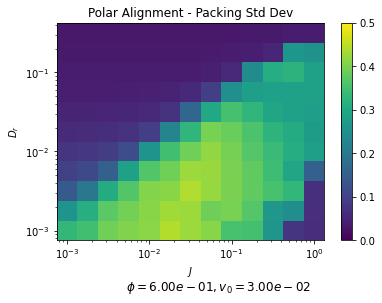

In [3]:
# July 14th Code:
save_dir = "/home/ryanlopez/Polar_Align_Box_L=200_July_8"
phi = 0.6
v0 = 0.03
J_vals = np.logspace(-3, 0, num=13)
Dr_vals = np.logspace(-3, 0, num=13)[:-2]
xedges = edges_from_centers_log(J_vals)
yedges = edges_from_centers_log(Dr_vals)
exp_folder_name = "phi=%.4f_and_v0=%.4f"%(phi, v0)
exp_dir = os.path.join(save_dir, exp_folder_name)
vicsek_vals = load_statistic_data('packing_std_dev', Dr_vals, J_vals, exp_dir)

#Make plot
fig, ax = plt.subplots()
plot = ax.pcolormesh(xedges, yedges, vicsek_vals, vmin=0, vmax=0.5)
plt.xscale('log')
plt.yscale('log')
plt.colorbar(plot)
plt.xlabel(r'$J$')
plt.ylabel(r'$D_r$')
plt.title('Polar Alignment - Packing Std Dev')
fig.text(.5, -0.05, rf'$\phi={phi:.2e}, v_0={v0:.2e}$', ha='center', fontsize=12)
save_fig_pdf(os.path.join(save_dir, 'phase_diagrams', 'packing_std_dev_diagram.pdf'))

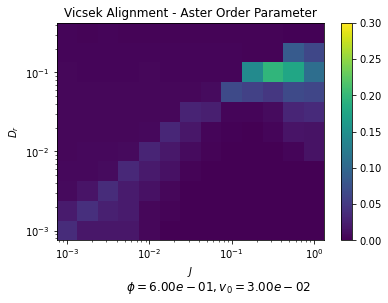

In [4]:
# July 14th Code:
save_dir = "/home/ryanlopez/Polar_Align_Box_L=200_July_8"
phi = 0.6
v0 = 0.03
J_vals = np.logspace(-3, 0, num=13)
Dr_vals = np.logspace(-3, 0, num=13)[:-2]
xedges = edges_from_centers_log(J_vals)
yedges = edges_from_centers_log(Dr_vals)
exp_folder_name = "phi=%.4f_and_v0=%.4f"%(phi, v0)
exp_dir = os.path.join(save_dir, exp_folder_name)
vicsek_vals = load_statistic_data('dir_cross_vel_norm', Dr_vals, J_vals, exp_dir)

#Make plot
fig, ax = plt.subplots()
plot = ax.pcolormesh(xedges, yedges, vicsek_vals, vmin=0, vmax=0.3)
plt.xscale('log')
plt.yscale('log')
plt.colorbar(plot)
plt.xlabel(r'$J$')
plt.ylabel(r'$D_r$')
plt.title('Vicsek Alignment - Aster Order Parameter')
fig.text(.5, -0.05, rf'$\phi={phi:.2e}, v_0={v0:.2e}$', ha='center', fontsize=12)
save_fig_pdf(os.path.join(save_dir, 'phase_diagrams', 'aster_diagram.pdf'))

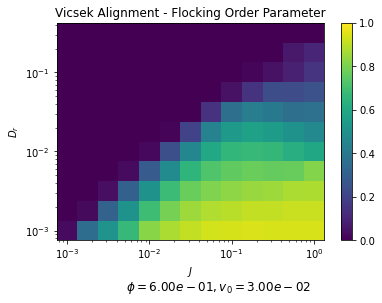

In [5]:
# July 14th Code:
save_dir = "/home/ryanlopez/Polar_Align_Box_L=200_July_8"
phi = 0.6
v0 = 0.03
J_vals = np.logspace(-3, 0, num=13)
Dr_vals = np.logspace(-3, 0, num=13)[:-2]
xedges = edges_from_centers_log(J_vals)
yedges = edges_from_centers_log(Dr_vals)
exp_folder_name = "phi=%.4f_and_v0=%.4f"%(phi, v0)
exp_dir = os.path.join(save_dir, exp_folder_name)
vicsek_vals = load_statistic_data('vicsek_param', Dr_vals, J_vals, exp_dir)

#Make plot
fig, ax = plt.subplots()
plot = ax.pcolormesh(xedges, yedges, vicsek_vals, vmin=0, vmax=1)
plt.xscale('log')
plt.yscale('log')
plt.colorbar(plot)
plt.xlabel(r'$J$')
plt.ylabel(r'$D_r$')
plt.title('Vicsek Alignment - Flocking Order Parameter')
fig.text(.5, -0.05, rf'$\phi={phi:.2e}, v_0={v0:.2e}$', ha='center', fontsize=12)
save_fig_pdf(os.path.join(save_dir, 'phase_diagrams', 'flocking_diagram.pdf'))

Text(0.5, -0.05, '$\\phi=6.00e-01, v_0=3.00e-02$')

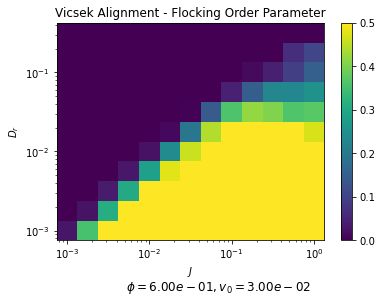

In [11]:
# July 14th Code:
save_dir = "/home/ryanlopez/Polar_Align_Box_L=200_July_8"
phi = 0.6
v0 = 0.03
J_vals = np.logspace(-3, 0, num=13)
Dr_vals = np.logspace(-3, 0, num=13)[:-2]
xedges = edges_from_centers_log(J_vals)
yedges = edges_from_centers_log(Dr_vals)
exp_folder_name = "phi=%.4f_and_v0=%.4f"%(phi, v0)
exp_dir = os.path.join(save_dir, exp_folder_name)
vicsek_vals = load_statistic_data('vicsek_param', Dr_vals, J_vals, exp_dir)

#Make plot
fig, ax = plt.subplots()
plot = ax.pcolormesh(xedges, yedges, vicsek_vals, vmin=0, vmax=0.5)
plt.xscale('log')
plt.yscale('log')
plt.colorbar(plot)
plt.xlabel(r'$J$')
plt.ylabel(r'$D_r$')
plt.title('Vicsek Alignment - Flocking Order Parameter')
fig.text(.5, -0.05, rf'$\phi={phi:.2e}, v_0={v0:.2e}$', ha='center', fontsize=12)
#save_fig_pdf(os.path.join(save_dir, 'phase_diagrams', 'packing_diagram.pdf'))

# August 22nd code

Text(0.5, -0.05, '$\\phi=6.00e-01, v_0=3.00e-02$')

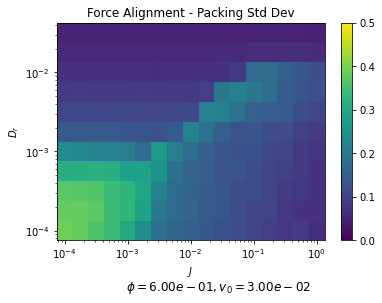

In [7]:
save_dir = "/home/ryanlopez/Force_Align_Box_L=200_July_8"
phi = 0.6
v0 = 0.03
Jv_vals = np.logspace(-4, 0, num=17)
J_vals = Jv_vals / v0
Dr_vals = np.logspace(-4, -1, num=13)[:-2]
xedges = edges_from_centers_log(Jv_vals)
yedges = edges_from_centers_log(Dr_vals)
exp_folder_name = "phi=%.4f_and_v0=%.4f"%(phi, v0)
exp_dir = os.path.join(save_dir, exp_folder_name)
vicsek_vals = load_statistic_data('packing_std_dev', Dr_vals, J_vals, exp_dir)

#Make plot
fig, ax = plt.subplots()
plot = ax.pcolormesh(xedges, yedges, vicsek_vals, vmin=0, vmax=0.5)
plt.xscale('log')
plt.yscale('log')
plt.colorbar(plot)
plt.xlabel(r'$J$')
plt.ylabel(r'$D_r$')
plt.title('Force Alignment - Packing Std Dev')
fig.text(.5, -0.05, rf'$\phi={phi:.2e}, v_0={v0:.2e}$', ha='center', fontsize=12)
#save_fig_pdf(os.path.join(save_dir, 'phase_diagrams', 'packing_std_dev_diagram.pdf'))

Text(0.5, -0.05, '$\\phi=6.00e-01, v_0=3.00e-02$')

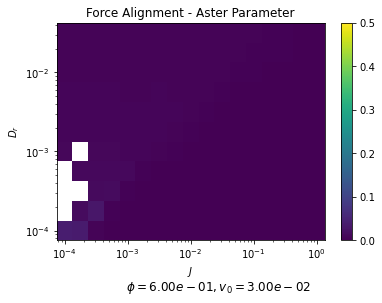

In [8]:
save_dir = "/home/ryanlopez/Force_Align_Box_L=200_July_8"
phi = 0.6
v0 = 0.03
Jv_vals = np.logspace(-4, 0, num=17)
J_vals = Jv_vals / v0
Dr_vals = np.logspace(-4, -1, num=13)[:-2]
xedges = edges_from_centers_log(Jv_vals)
yedges = edges_from_centers_log(Dr_vals)
exp_folder_name = "phi=%.4f_and_v0=%.4f"%(phi, v0)
exp_dir = os.path.join(save_dir, exp_folder_name)
vicsek_vals = load_statistic_data('dir_cross_vel_norm', Dr_vals, J_vals, exp_dir)

#Make plot
fig, ax = plt.subplots()
plot = ax.pcolormesh(xedges, yedges, vicsek_vals, vmin=0, vmax=0.5)
plt.xscale('log')
plt.yscale('log')
plt.colorbar(plot)
plt.xlabel(r'$J$')
plt.ylabel(r'$D_r$')
plt.title('Force Alignment - Aster Parameter')
fig.text(.5, -0.05, rf'$\phi={phi:.2e}, v_0={v0:.2e}$', ha='center', fontsize=12)
#save_fig_pdf(os.path.join(save_dir, 'phase_diagrams', 'packing_std_dev_diagram.pdf'))

# Plot Multiple Phase Diagrams

KeyError: 'packing_std_dev'

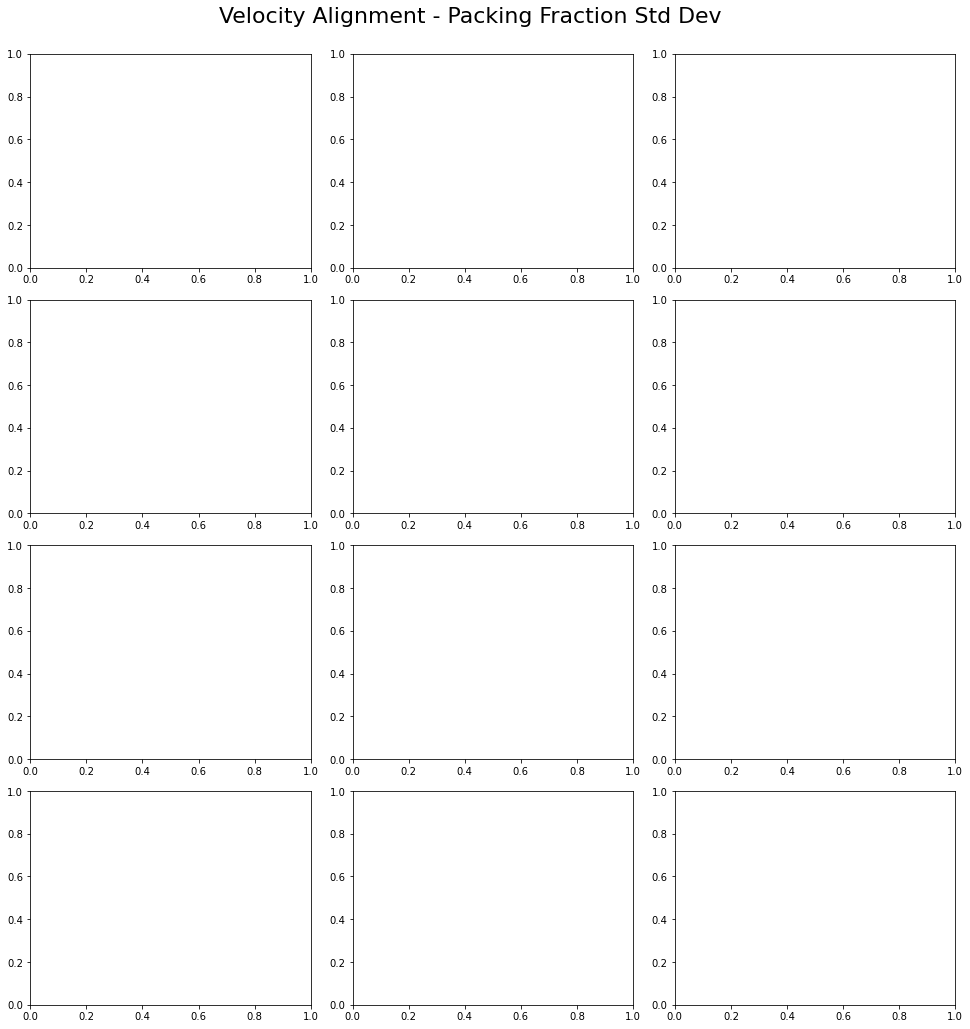

In [5]:
save_dir = "/home/ryanlopez/Velocity_Align_Vary_Phi_V_Saved_Data2"
phi_vals = [0.4, 0.6, 0.8, 1.0]
v0_vals = [0.01, 0.03, 0.1]
Jv_vals = np.logspace(-3, 0, num=4)
Dr_vals = np.logspace(-3, 0, num=4)

#Get Dr and J bins
x_bins = edges_from_centers_log(Jv_vals)
y_bins = edges_from_centers_log(Dr_vals)
xedges, yedges = np.meshgrid(x_bins,y_bins)

#Make plot
fig, axs = plt.subplots(len(phi_vals), len(v0_vals), figsize=(14, 15))
fig.tight_layout(rect=[0.03, 0.03, 1, 0.95])
fig.suptitle('Velocity Alignment - Packing Fraction Std Dev', fontsize=22)
for v0_index, v0 in enumerate(v0_vals):
    for phi_index, phi in enumerate(phi_vals):
        #Load Data
        exp_folder_name = "phi=%.4f_and_v0=%.4f"%(phi, v0)
        exp_dir = os.path.join(save_dir, exp_folder_name)
        J_vals = Jv_vals / v0
        order_param_vals = load_statistic_data('packing_std_dev', Dr_vals, J_vals, exp_dir)
        #Make plot
        axs[phi_index, v0_index].set_xscale('log')
        axs[phi_index, v0_index].set_yscale('log')
        ax = axs[phi_index, v0_index].pcolormesh(xedges, yedges, order_param_vals, vmin=0, vmax=0.3)
        plt.colorbar(ax, ax=axs[phi_index, v0_index])
        axs[phi_index, v0_index].set_xlabel(r'$Jv_0$')
        axs[phi_index, v0_index].set_ylabel(r'$D_r$')
        if phi_index == 0:
            axs[phi_index, v0_index].set_title(rf'$v_0$={v0:.2e}', fontsize=18)
        if v0_index == 0:
            axs[phi_index, v0_index].set_ylabel(rf'$\phi$={phi:.2e}', fontsize=18)
save_fig_pdf(os.path.join(save_dir, 'phase_diagrams', 'packing_std_dev_diagrams.pdf'))

# Plot Single Phase Diagram

In [ ]:
save_dir = "/home/ryanlopez/Velocity_Align_Norm_Tests"
phi = 0.6
v0 = 0.03
J_vals = np.logspace(-3, 0, num=7)
Dr_vals = np.logspace(-3, 0, num=7)
xedges = edges_from_centers_log(J_vals)
yedges = edges_from_centers_log(Dr_vals)
exp_folder_name = "phi=%.4f_and_v0=%.4f"%(phi, v0)
exp_dir = os.path.join(save_dir, exp_folder_name)
vicsek_vals = load_statistic_data('dir_cross_vel_norm', Dr_vals, J_vals, exp_dir)

#Make plot
fig, ax = plt.subplots()
plot = ax.pcolormesh(xedges, yedges, vicsek_vals, vmin=0, vmax=0.1)
plt.xscale('log')
plt.yscale('log')
plt.colorbar(plot)
plt.xlabel(r'$Jv_0$')
plt.ylabel(r'$D_r$')
plt.title('Velocity Alignment - Velocity Vicsek')
fig.text(.5, -0.05, rf'$\phi={phi:.2e}, v_0={v0:.2e}$', ha='center', fontsize=12)
#save_fig_pdf(os.path.join(save_dir, exp_folder_name, 'phase_diagrams', 'packing_std_dev_diagram.pdf'))

In [ ]:
save_dir = "/home/ryanlopez/Polar_Align_Big_Phase_Diagrams"
phi = 0.6
v0 = 0.03
J_vals = np.logspace(-3, 0, num=13)
Dr_vals = np.logspace(-3, 0, num=13)
xedges = edges_from_centers_log(J_vals)
yedges = edges_from_centers_log(Dr_vals)
exp_folder_name = "phi=%.4f_and_v0=%.4f"%(phi, v0)
exp_dir = os.path.join(save_dir, exp_folder_name)
vicsek_vals = load_statistic_data('velocity_vicsek_param', Dr_vals, J_vals, exp_dir)

#Make plot
fig, ax = plt.subplots()
plot = ax.pcolormesh(xedges, yedges, vicsek_vals, vmin=0, vmax=1)
plt.xscale('log')
plt.yscale('log')
cbar = plt.colorbar(plot)
cbar.ax.tick_params(labelsize=14)
plt.xlabel(r'$J$ - Alignment Strength', fontsize=18)
plt.ylabel(r'$D_r$ - Rotational Noise', fontsize=18)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Flocking Order Parameter', fontsize=22, pad=12)
#save_fig_pdf(os.path.join(save_dir, exp_folder_name, 'phase_diagrams', 'velocity_vicsek_diagrams.pdf'))